# Scipy filters compatibility

## Only for Google Colab users:

In [ ]:
%pip install --upgrade ipympl speasy
try:
    from google.colab import output

    output.enable_custom_widget_manager()
except:
    print("Not running inside Google Collab")
    

## For all users:

In [1]:
import speasy as spz
from speasy.core.any_files import any_loc_open
from speasy.core.cdf import load_variable
from speasy.signal.filtering import sosfiltfilt
import numpy as np
%matplotlib widget
mms1_products = spz.inventories.tree.cda.MMS.MMS1
# Use this instead if you are not using jupyterlab yet
#%matplotlib notebook
import matplotlib.pyplot as plt
from scipy import signal

## Loading data

Let's use the MMS1 EDP burst data from the CDAWeb to test the filtering.

In [2]:
mms1_edp_hmfe_par_epar_brst_l2 = load_variable( "mms1_edp_hmfe_par_epar_brst_l2", "https://cdaweb.gsfc.nasa.gov/pub/data/mms/mms1/edp/brst/l2/hmfe/2021/07/mms1_edp_brst_l2_hmfe_20210701020013_v2.0.0.cdf")

In [3]:
sampling_frequency = 1e9/float(mms1_edp_hmfe_par_epar_brst_l2.time[1]-mms1_edp_hmfe_par_epar_brst_l2.time[0])
sampling_frequency

65535.09404285995

## Filtering with scipy.signal 

Let's design a time domain bandpass filter with scipy.signal cutting off frequencies below 100 Hz and above 10 kHz.

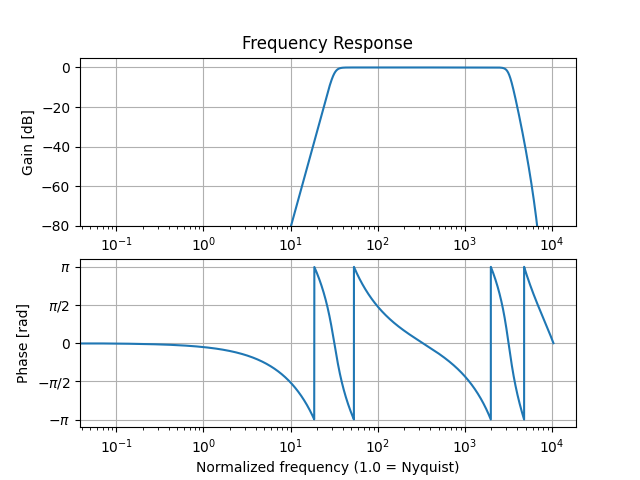

In [4]:
sos = signal.iirfilter(N=8, Wn=[100, 10000], rs=80, btype='bandpass',output='sos', fs=sampling_frequency)
w, h = signal.sosfreqz(sos, worN=150000, fs=sampling_frequency)
plt.figure()
plt.subplot(2, 1, 1)
db = 20*np.log10(np.maximum(np.abs(h), 1e-5))
plt.plot(w/np.pi, db)
plt.ylim(-75, 5)
plt.grid(True)
plt.yticks([0, -20, -40, -60, -80])
plt.semilogx()
plt.ylabel('Gain [dB]')
plt.title('Frequency Response')
plt.subplot(2, 1, 2)
plt.plot(w/np.pi, np.angle(h))
plt.grid(True)
plt.yticks([-np.pi, -0.5*np.pi, 0, 0.5*np.pi, np.pi],
           [r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'])
plt.ylabel('Phase [rad]')
plt.xlabel('Normalized frequency (1.0 = Nyquist)')
plt.semilogx()
plt.show()

## Speasy variables filtering

We can directly filter the data using the sos filter designed with scipy.signal.


In [5]:
filtered_mms1_edp_hmfe_par_epar_brst_l2 = sosfiltfilt(sos, mms1_edp_hmfe_par_epar_brst_l2)

## Plotting the results

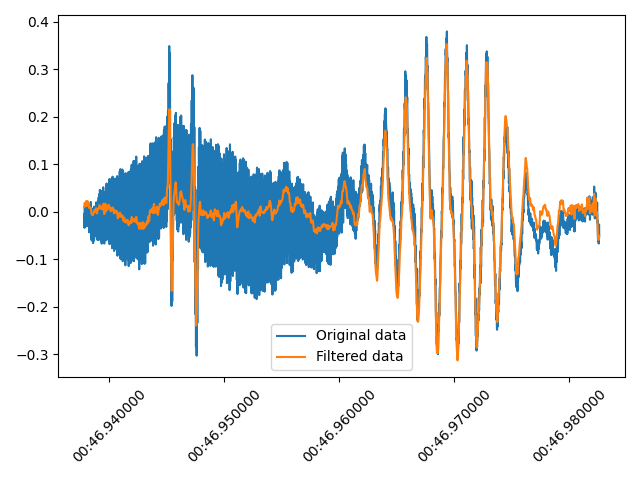

In [6]:
start_time = np.datetime64("2021-07-01T02:00:46.9378", "ns")
stop_time = np.datetime64("2021-07-01T02:00:46.9826", "ns")
filtered_mms1_edp_hmfe_par_epar_brst_l2 = filtered_mms1_edp_hmfe_par_epar_brst_l2[start_time:stop_time]
mms1_edp_hmfe_par_epar_brst_l2 = mms1_edp_hmfe_par_epar_brst_l2[start_time:stop_time]

plt.figure()
plt.plot(mms1_edp_hmfe_par_epar_brst_l2.time, mms1_edp_hmfe_par_epar_brst_l2.values, label="Original data")
plt.plot(filtered_mms1_edp_hmfe_par_epar_brst_l2.time, filtered_mms1_edp_hmfe_par_epar_brst_l2.values, label="Filtered data")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()